In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data from the Downloads folder
file_path = "~/Downloads/ASTR19_S22_group_project_data.txt"
columns = ["Day", "Time", "TideHeight"]

df = pd.read_csv(file_path, sep="\s+", header=None, names=columns)

# Convert Time column to datetime
df["Time"] = pd.to_datetime(df["Time"], errors='coerce', format='%H:%M').dt.time

# Display the first few rows of the dataframe
df.head()

,Day,Time,TideHeight
0,1,08:07:00,6.57
1,1,15:37:00,-0.39
2,2,08:55:00,5.38
3,2,16:25:00,-1.74
4,3,09:45:00,5.26


In [63]:
# Define the oscillatory function
def oscillatory_function(t, amplitude, frequency, phase, offset):
    return amplitude * np.sin(2 * np.pi * frequency * t + phase) + offset

# Initial guess for the parameters
time_values = np.arange(len(df))
initial_guess = [3, 1/24, 0, 3]

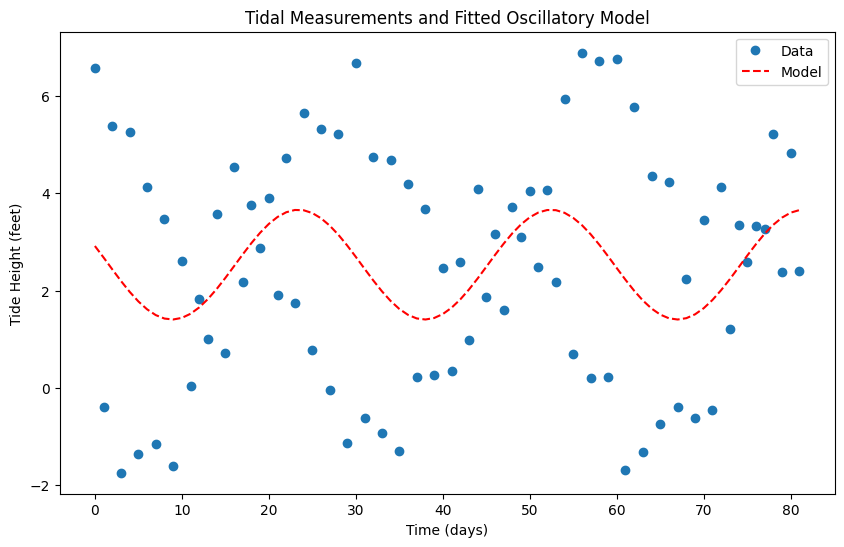

In [69]:
from scipy.optimize import curve_fit

# Fit the oscillatory function to the data
params, covariance = curve_fit(oscillatory_function, time_values, df["TideHeight"].values, p0=initial_guess)

# Plot the data and the fitted model
plt.figure(figsize=(10, 6))
plt.plot(time_values, df["TideHeight"].values, label="Data", marker='o', linestyle='None')
plt.plot(time_values, oscillatory_function(time_values, *params), label="Model", linestyle='--', color='red')
plt.xlabel("Time (days)")
plt.ylabel("Tide Height (feet)")
plt.title("Tidal Measurements and Fitted Oscillatory Model")
plt.legend()
plt.savefig("tide_data_and_model.pdf")
plt.show()

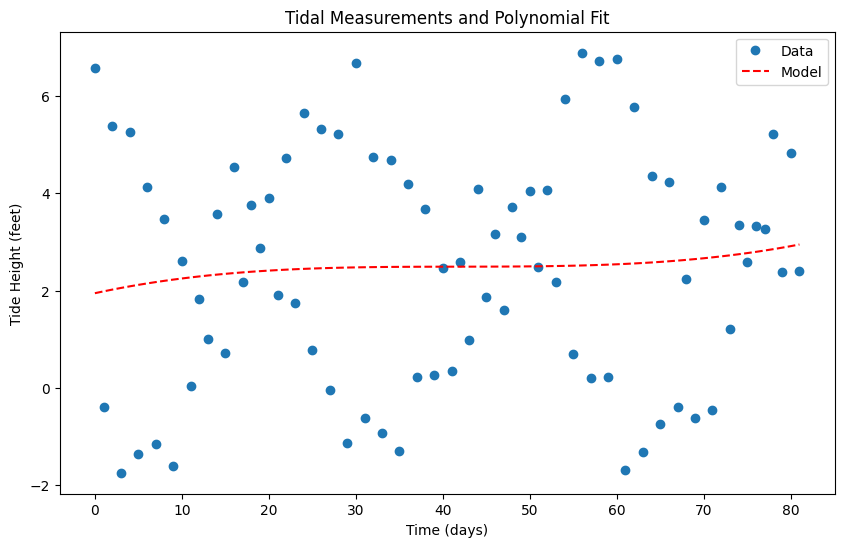

In [70]:
# Cell 4: Plot Data and Model
# Plot the data and the polynomial fit
plt.figure(figsize=(10, 6))
plt.plot(np.array(time_values), df["TideHeight"].values, label="Data", marker='o', linestyle='None')
plt.plot(np.array(time_values), poly_function(np.array(time_values)), label="Model", linestyle='--', color='red')
plt.xlabel("Time (days)")
plt.ylabel("Tide Height (feet)")
plt.title("Tidal Measurements and Polynomial Fit")
plt.legend()
plt.savefig("tide_polyfit.pdf")
plt.show()

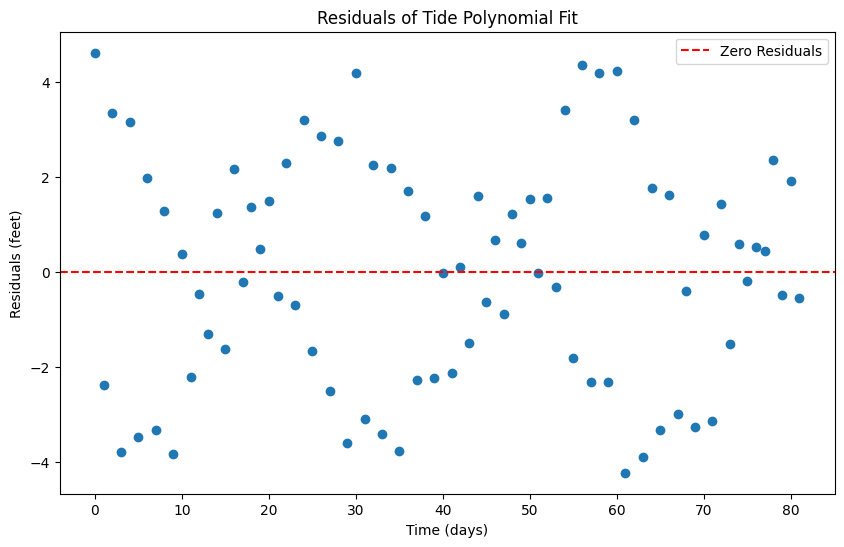

In [71]:
# Cell 5: Calculate and Plot Residuals
# Calculate residuals
residuals = df["TideHeight"].values - poly_function(time_values)

# Plot residuals
plt.figure(figsize=(10, 6))
plt.plot(np.array(time_values), residuals, marker='o', linestyle='None')
plt.axhline(y=0, color='r', linestyle='--', label="Zero Residuals")
plt.xlabel("Time (days)")
plt.ylabel("Residuals (feet)")
plt.title("Residuals of Tide Polynomial Fit")
plt.legend()
plt.savefig("tide_polyfit_residuals.pdf")
plt.show()

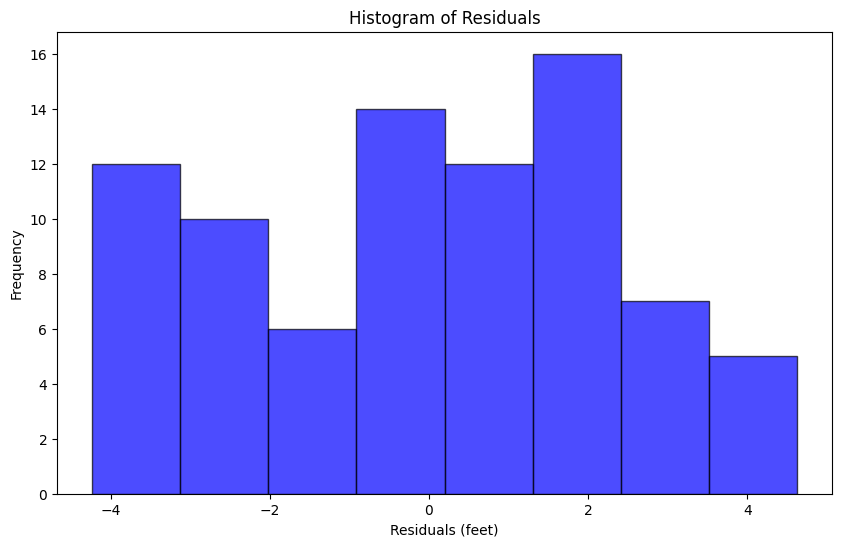

In [72]:
# Cell 6: Assess Deviations and Plot Histogram
# Assess deviations and plot histogram
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins='auto', alpha=0.7, color='blue', edgecolor='black')
plt.xlabel("Residuals (feet)")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.savefig("polyfit_residuals_histogram.pdf")
plt.show()

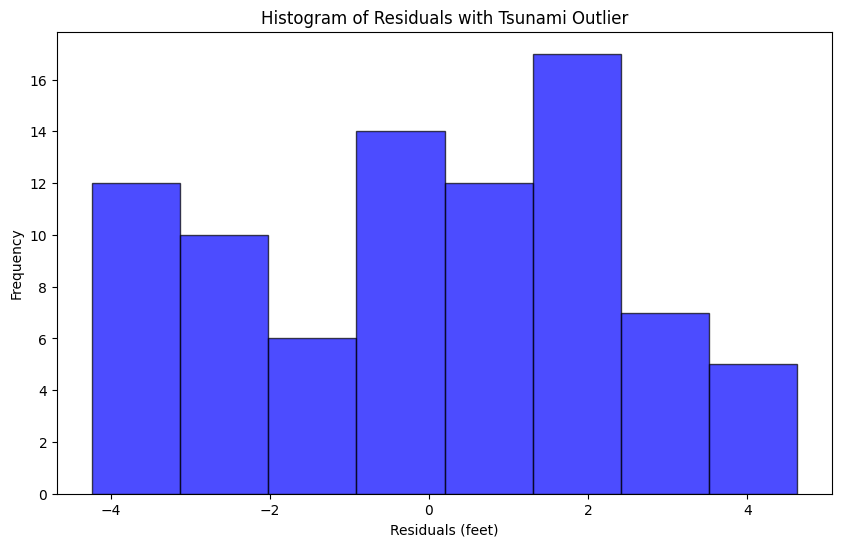

In [73]:
# Add tsunami outlier and replot histogram
tsunami_outlier = 2.0
residuals_with_tsunami = np.append(residuals, tsunami_outlier)

plt.figure(figsize=(10, 6))
plt.hist(residuals_with_tsunami, bins='auto', alpha=0.7, color='blue', edgecolor='black')
plt.xlabel("Residuals (feet)")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals with Tsunami Outlier")
plt.savefig("oscillatory_fit_residuals_histogram_with_tsunami.pdf")
plt.show()